In [2]:
import numpy as np
import onnxruntime as ort
import cv2
import matplotlib.pyplot as plt

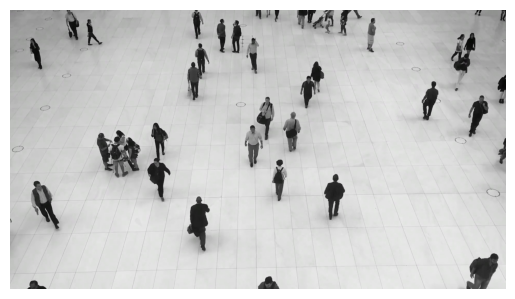

In [5]:
image = cv2.imread("test.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
INPUT_SIZE = (384,384) # nano uses (384,384) and small (512, 512) 

def load_and_preprocess_image(image):
    H_orig, W_orig = image.shape[:2]
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, INPUT_SIZE, interpolation=cv2.INTER_CUBIC)

    img = img.astype(np.float32) / 255.0

    # using imagenet's mean and std, mentioned in rfdetr's repo
    mean =  np.array([0.485, 0.456, 0.406], dtype=np.float32).reshape(1,1,3)
    std = np.array([0.229, 0.224, 0.225], dtype=np.float32).reshape(1,1,3)

    img = (img - mean) / std

    img = np.transpose(img, (2,0,1)) 
    img = np.expand_dims(img, axis=0)

    return img, (H_orig, W_orig)

In [17]:
temp_img = np.zeros((384,384,3), np.float32)
temp_img = np.transpose(temp_img, (2,0,1))
temp_img = np.expand_dims(temp_img, axis=0)
print(temp_img.shape)

(1, 3, 384, 384)


In [20]:
def inference(image, model):
    img = image.copy()
    session = ort.InferenceSession(model, providers=["CPUExecutionProvider"])
    outputs = session.run(output_names=None, input_feed={"input": img})
    return outputs

img = cv2.imread("test.png")
img, orig_hw = load_and_preprocess_image(img)
outputs = inference(img, "output_nano/inference_model_sim.onnx")
outputs 

[array([[[0.38236198, 0.7672969 , 0.04243388, 0.1978717 ],
         [0.6534769 , 0.66992056, 0.04366056, 0.1653653 ],
         [0.5423949 , 0.6096306 , 0.03056129, 0.1543281 ],
         ...,
         [0.05415053, 0.6342256 , 0.01650191, 0.0349182 ],
         [0.9534866 , 0.9230438 , 0.04408301, 0.07542408],
         [0.9828648 , 0.95034885, 0.03279445, 0.0786123 ]]], dtype=float32),
 array([[[-6.693164 ,  0.8780422, -5.577772 , ..., -5.3945003,
          -6.539479 , -7.9868135],
         [-6.7278066,  1.147192 , -5.8985577, ..., -5.929277 ,
          -7.0164747, -8.322263 ],
         [-6.7663937,  1.0500832, -4.670324 , ..., -5.699952 ,
          -6.8570747, -8.529751 ],
         ...,
         [-6.7857037, -4.1216884, -5.230175 , ..., -5.6029043,
          -6.319699 , -6.257025 ],
         [-6.9448376, -4.2360806, -4.6888137, ..., -5.1789722,
          -5.025433 , -6.7805166],
         [-7.20376  , -4.048356 , -4.1375093, ..., -5.7005296,
          -7.255717 , -7.24592  ]]], dtype=floa